In [2]:
import pandas as pd

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [3]:
import xlsxwriter

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
%ls

README.md               wykresy_xlsx.ipynb
wyceny_2018_01_04.xlsx  xlsx/


In [7]:
df = pd.read_excel('wyceny_2018_01_04.xlsx')

In [69]:
df.head(5)

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Flexi Asia Bond,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY
2004-01-27,100.000,100.000,100.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004-01-28,100.310,100.310,100.310,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004-01-29,100.310,100.310,100.290,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004-01-30,100.320,100.270,100.130,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2004-02-02,100.340,100.320,100.200,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [8]:
df = df.rename({'Allianz SFIO Flexi Asia Bond': 'Allianz SFIO Artificial Intelligence'}, axis='columns')

In [9]:
df = df.drop_duplicates(keep='first')

#new_index = pd.date_range(start=df.index[0], end=df.index[-1], freq='D')

#df = df.reindex(new_index, method='ffill')

In [10]:
df.loc[df.index.duplicated()]

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Artificial Intelligence,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY


In [11]:
df.loc['2016-06-17'].index

Index(['Allianz Obligacji Plus', 'Allianz Stabilnego Wzrostu', 'Allianz Akcji',
       'Allianz Pieniężny', 'Allianz Polskich Obligacji Skarbowych',
       'Allianz Aktywnej Alokacji', 'Allianz Selektywny',
       'Allianz Małych i Średnich Spółek',
       'Allianz FIO Subfundusz Akcji Globalnych',
       'Allianz FIO Subfundusz Obligacji Globalnych',
       'Allianz FIO Subfundusz Surowców i Energii',
       'Allianz Akcji Rynków Wschodzących SFIO',
       'SFIO Defensywna Multistrategia', 'SFIO Zbalansowana Multistrategia',
       'SFIO Dynamiczna Multistrategia', 'SFIO Małych Spółek Europejskich',
       'SFIO Dywidendowy Akcji Europejskich',
       'Allianz FIO Allianz Globalny Stabilnego Dochodu',
       'Allianz SFIO Europe Equity Growth Select',
       'Allianz SFIO Artificial Intelligence',
       'Allianz SFIO Global Metals and Mining', 'Allianz SFIO India Equity',
       'Allianz SFIO US Short Duration High Income Bond',
       'Allianz SFIO PIMCO Global Low Duration Real Ret

In [12]:


df = df.resample('D').ffill()

In [74]:
df.tail(15)

,Allianz Obligacji Plus,Allianz Stabilnego Wzrostu,Allianz Akcji,Allianz Pieniężny,Allianz Polskich Obligacji Skarbowych,Allianz Aktywnej Alokacji,Allianz Selektywny,Allianz Małych i Średnich Spółek,Allianz FIO Subfundusz Akcji Globalnych,Allianz FIO Subfundusz Obligacji Globalnych,Allianz FIO Subfundusz Surowców i Energii,Allianz Akcji Rynków Wschodzących SFIO,SFIO Defensywna Multistrategia,SFIO Zbalansowana Multistrategia,SFIO Dynamiczna Multistrategia,SFIO Małych Spółek Europejskich,SFIO Dywidendowy Akcji Europejskich,Allianz FIO Allianz Globalny Stabilnego Dochodu,Allianz SFIO Europe Equity Growth Select,Allianz SFIO Artificial Intelligence,Allianz SFIO Global Metals and Mining,Allianz SFIO India Equity,Allianz SFIO US Short Duration High Income Bond,Allianz SFIO PIMCO Global Low Duration Real Return,Allianz SFIO Structured Return (Pieniężny Globalny),Allianz SFIO PIMCO Global Bond,Allianz SFIO PIMCO Global High Yield Bond,Allianz SFIO PIMCO Global Investment Grade Credit,Allianz SFIO PIMCO Emerging Local Bond,Allianz SFIO PIMCO Income,Allianz SFIO PIMCO Emerging Markets Bond,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ AKCJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ ZRÓWNOWAŻONY,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ STABILNEGO WZROSTU,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ OBLIGACJI,BEZPIECZNA JESIEŃ SFIO SUBFUNDUSZ PIENIĘŻNY
2017-12-15,169.140,130.120,150.420,154.690,142.340,103.720,99.620,138.180,125.940,109.330,97.380,111.760,106.710,113.060,119.550,119.200,113.090,113.580,110.080,106.280,109.760,118.560,103.810,100.850,102.580,100.910,110.000,103.240,101.470,107.270,106.490,14.430,14.110,13.950,13.280,12.380
2017-12-16,169.140,130.120,150.420,154.690,142.340,103.720,99.620,138.180,125.940,109.330,97.380,111.760,106.710,113.060,119.550,119.200,113.090,113.580,110.080,106.280,109.760,118.560,103.810,100.850,102.580,100.910,110.000,103.240,101.470,107.270,106.490,14.430,14.110,13.950,13.280,12.380
2017-12-17,169.140,130.120,150.420,154.690,142.340,103.720,99.620,138.180,125.940,109.330,97.380,111.760,106.710,113.060,119.550,119.200,113.090,113.580,110.080,106.280,109.760,118.560,103.810,100.850,102.580,100.910,110.000,103.240,101.470,107.270,106.490,14.430,14.110,13.950,13.280,12.380
2017-12-18,169.170,130.810,152.540,154.720,142.330,104.430,101.030,138.670,126.980,109.390,97.780,112.420,107.090,113.900,120.860,120.370,113.570,113.810,111.180,107.270,110.670,119.490,103.840,100.840,102.570,100.920,110.040,103.230,102.530,107.310,106.580,14.620,14.190,14.000,13.280,12.390
2017-12-19,169.130,130.620,152.080,154.640,142.130,104.300,100.720,138.510,127.710,109.300,98.350,113.370,107.180,114.240,121.390,121.040,113.830,113.800,111.610,108.690,112.260,121.090,103.730,100.700,102.500,100.620,109.950,102.840,102.180,107.140,106.470,14.590,14.160,13.960,13.240,12.380
2017-12-20,169.090,130.440,151.760,154.620,142.050,104.060,100.500,137.310,127.240,109.210,98.530,113.200,106.710,113.640,120.660,120.770,113.270,113.620,111.110,107.750,112.290,120.800,103.650,100.560,102.400,100.450,109.910,102.650,102.670,107.030,106.310,14.580,14.150,13.950,13.230,12.380
2017-12-21,169.050,130.460,152.110,154.640,142.110,104.050,100.730,138.010,126.980,109.240,98.860,113.320,106.310,113.200,120.130,120.100,112.850,113.590,110.340,107.570,113.150,120.850,103.690,100.650,102.390,100.480,109.990,102.650,102.350,107.110,106.280,14.600,14.160,13.970,13.240,12.380
2017-12-22,169.070,130.440,151.810,154.650,142.180,104.140,100.530,138.730,127.450,109.230,99.340,113.950,106.510,113.600,120.690,120.530,113.900,113.740,111.130,107.190,114.360,121.290,103.700,100.630,102.420,100.510,110.060,102.640,102.280,107.010,106.390,14.560,14.150,13.970,13.260,12.390
2017-12-23,169.070,130.440,151.810,154.650,142.180,104.140,100.530,138.730,127.450,109.230,99.340,113.950,106.510,113.600,120.690,120.530,113.900,113.740,111.130,107.190,114.360,121.290,103.700,100.630,102.420,100.510,110.060,102.640,102.280,107.010,106.390,14.560,14.150,13.970,13.260,12.390
2017-12-24,169.070,130.440,151.810,154.65

In [75]:
df.shape

(5086, 36)

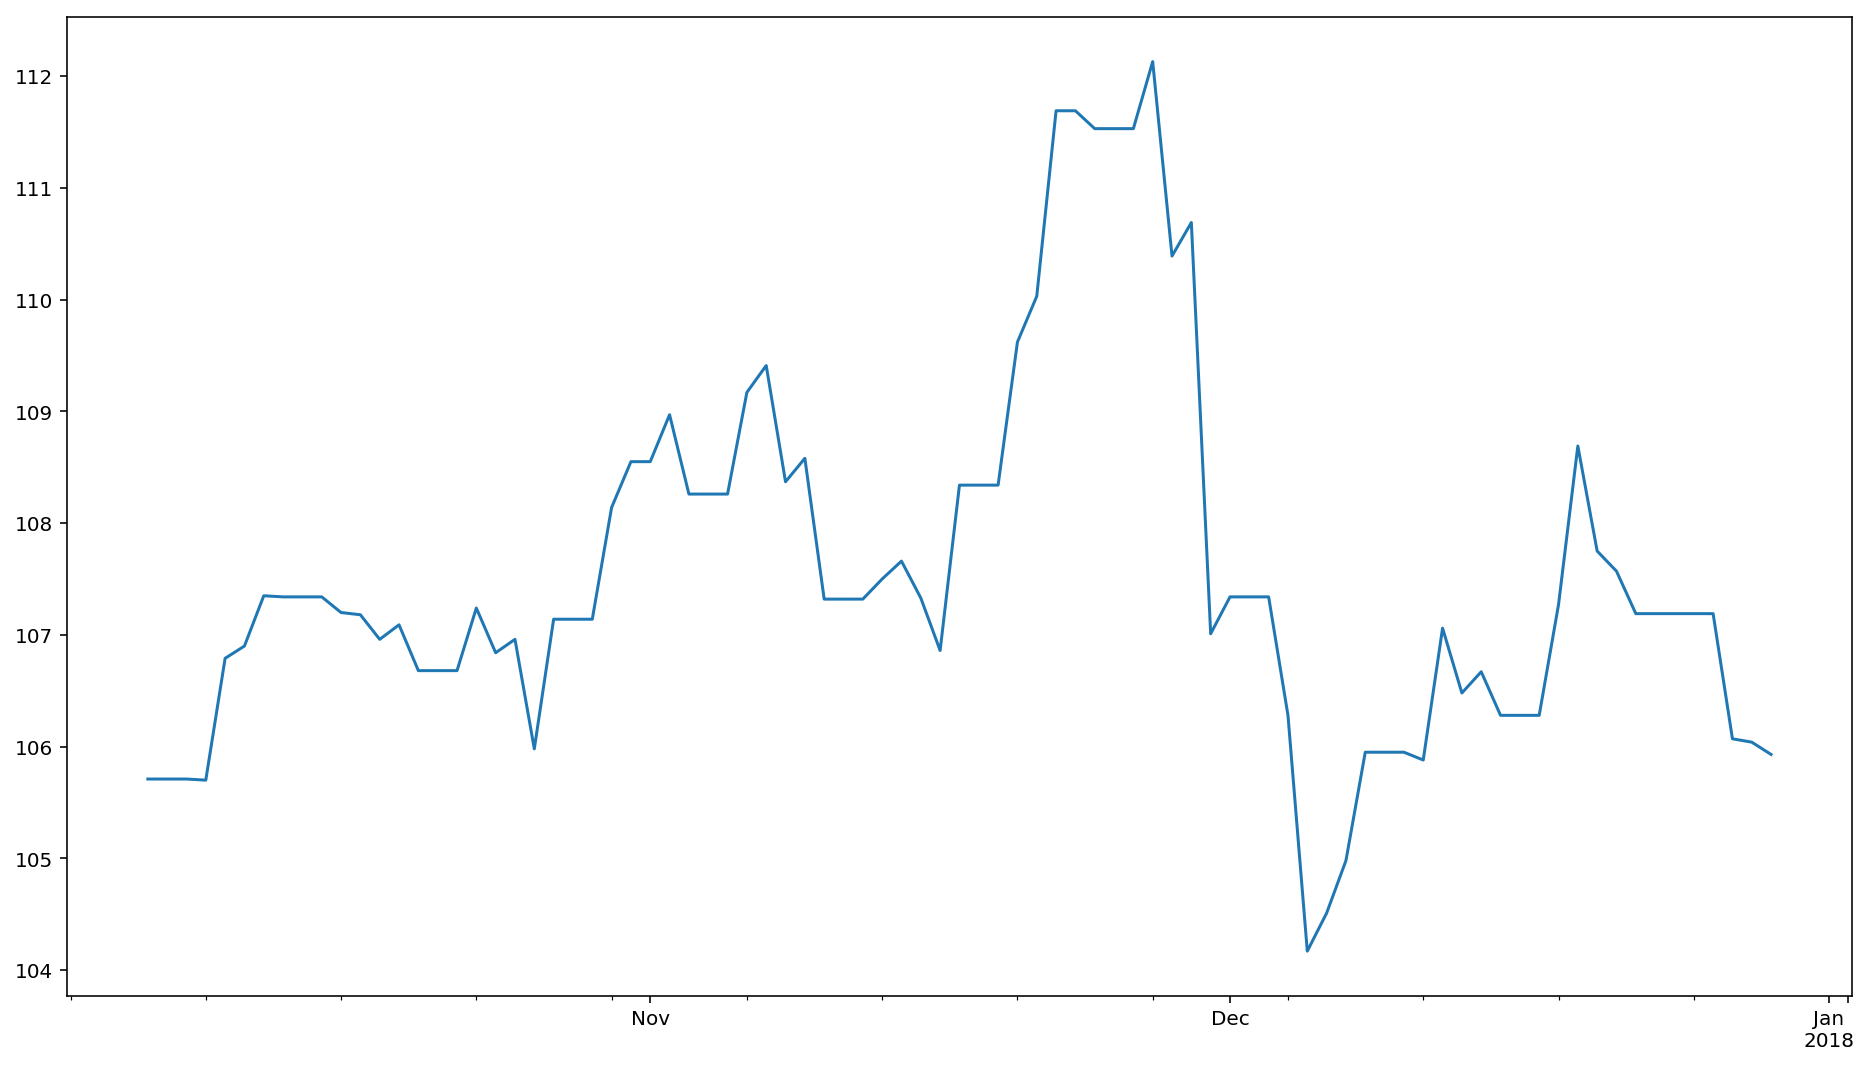

In [13]:
df.loc['2017-10-06':]['Allianz SFIO Artificial Intelligence'].plot(figsize=(16,9))

In [14]:
for i in df.columns:
    print(i)

Allianz Obligacji Plus
Allianz Stabilnego Wzrostu
Allianz Akcji
Allianz Pieniężny
Allianz Polskich Obligacji Skarbowych
Allianz Aktywnej Alokacji
Allianz Selektywny
Allianz Małych i Średnich Spółek
Allianz FIO Subfundusz Akcji Globalnych
Allianz FIO Subfundusz Obligacji Globalnych
Allianz FIO Subfundusz Surowców i Energii
Allianz Akcji Rynków Wschodzących SFIO
SFIO Defensywna Multistrategia
SFIO Zbalansowana Multistrategia
SFIO Dynamiczna Multistrategia
SFIO Małych Spółek Europejskich
SFIO Dywidendowy Akcji Europejskich
Allianz FIO Allianz Globalny Stabilnego Dochodu
Allianz SFIO Europe Equity Growth Select
Allianz SFIO Artificial Intelligence
Allianz SFIO Global Metals and Mining
Allianz SFIO India Equity
Allianz SFIO US Short Duration High Income Bond
Allianz SFIO PIMCO Global Low Duration Real Return
Allianz SFIO Structured Return (Pieniężny Globalny)
Allianz SFIO PIMCO Global Bond
Allianz SFIO PIMCO Global High Yield Bond
Allianz SFIO PIMCO Global Investment Grade Credit
Allianz SF

In [21]:
fundusz = 'Allianz SFIO Artificial Intelligence'
data_start = '2017-10-06'


writer = pd.ExcelWriter('xlsx/Artificial.xlsx', engine='xlsxwriter', datetime_format='yyyy-mm-dd',)

df.loc[data_start:][fundusz].to_excel(writer, sheet_name='Sheet1')

max = df.loc[data_start:][fundusz].max()
min = df.loc[data_start:][fundusz].min()

workbook = writer.book
worksheet = writer.sheets['Sheet1']

chart = workbook.add_chart({'type': 'line'})

chart.add_series({
    'categories': '=Sheet1!A:A',
    'values': '=Sheet1!B:B',
    'name': '=Sheet1!B1'
})

chart.set_y_axis({
   'max': max,
   'min': min,
})


chart.set_title({'name': 'Wartość jednostki uczestnictwa'})

worksheet.insert_chart('C2', chart, {'x_scale': 2, 'y_scale': 1.5})



formatdict = {'num_format':'yyyy-mm-dd'}
fmt = workbook.add_format(formatdict)

worksheet.set_column(0,0, 10, fmt)


one_M = df.iloc[-1][fundusz]/df.iloc[-31][fundusz]-1
two_M = df.iloc[-1][fundusz]/df.iloc[-61][fundusz]-1
three_M = df.iloc[-1][fundusz]/df.iloc[-91][fundusz]-1
six_M = df.iloc[-1][fundusz]/df.iloc[-183][fundusz]-1
twelve_M = df.iloc[-1][fundusz]/df.iloc[-366][fundusz]-1


format_percent = workbook.add_format()
format_percent.set_num_format('0.0%')

worksheet.write(25, 4,     one_M, format_percent)
worksheet.write(25, 5,     two_M, format_percent)
worksheet.write(25, 6,     three_M, format_percent)
worksheet.write(25, 7,     six_M, format_percent)
worksheet.write(25, 8,     twelve_M, format_percent)

worksheet.write(24, 4,     '1M')
worksheet.write(24, 5,     '2M')
worksheet.write(24, 6,     '3M')
worksheet.write(24, 7,     '6M')
worksheet.write(24, 8,     '12M')






chart_col = workbook.add_chart({'type': 'column'})
chart_col.add_series({'values': '=Sheet1!$E$26:$I$26',
                     'categories': '=Sheet1!$E$25:$I$25',
                     'name': '=Sheet1!B1',
                     'data_labels': {'value': True},})

chart_col.set_title({'name': 'Stopa zwrotu'})

worksheet.insert_chart('C28', chart_col, {'x_scale': 2, 'y_scale': 1.5})


workbook.close()
writer.save()

In [28]:
df.loc[df.index.max()]['Allianz SFIO Artificial Intelligence']

105.93000000000001

In [30]:
df.index.max(), df.index.max()-365

(Timestamp('2017-12-29 00:00:00', freq='D'),
 Timestamp('2016-12-29 00:00:00', freq='D'))

In [93]:
fundusz = 'Allianz SFIO Artificial Intelligence'
df.iloc[-1][fundusz]/df.iloc[-31][fundusz]-1

-0.04300298129912361

In [91]:
df[fundusz].tail()

2017-12-25   107.190
2017-12-26   107.190
2017-12-27   106.070
2017-12-28   106.040
2017-12-29   105.930
Freq: D, Name: Allianz SFIO Artificial Intelligence, dtype: float64

In [76]:
(df.iloc[-1]/df.iloc[-30]-1)*100

Allianz Obligacji Plus                                  0.195
Allianz Stabilnego Wzrostu                              1.689
Allianz Akcji                                           3.194
Allianz Pieniężny                                       0.246
Allianz Polskich Obligacji Skarbowych                   0.261
Allianz Aktywnej Alokacji                               1.963
Allianz Selektywny                                      3.191
Allianz Małych i Średnich Spółek                        4.179
Allianz FIO Subfundusz Akcji Globalnych                 2.256
Allianz FIO Subfundusz Obligacji Globalnych             0.285
Allianz FIO Subfundusz Surowców i Energii               2.987
Allianz Akcji Rynków Wschodzących SFIO                  1.791
SFIO Defensywna Multistrategia                          0.797
SFIO Zbalansowana Multistrategia                        1.882
SFIO Dynamiczna Multistrategia                          2.671
SFIO Małych Spółek Europejskich                         3.506
SFIO Dyw